# Notebook_1

In [48]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from bs4 import BeautifulSoup
import re
import json
from urllib.request import Request, urlopen
from lxml import html
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [49]:
#return only 25 first movies, because it doesn't wait the complete render of the page
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response


<Response [200]>

In [50]:
print(response)

<Response [200]>


In [51]:
html = response.text
html

'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1725761350628);\n        }\n    })</script><title>IMDb Top 250 Movies</title><meta name="description" content="As rated by regular IMDb voters." data-id="main"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","ur

In [52]:
bs = BeautifulSoup(html)
print(bs)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725761350628);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/t

In [53]:
titles = bs.find_all('h3', attrs={'class':'ipc-title__text'})
for t in titles:
  print(t)

<h3 class="ipc-title__text">IMDb Charts</h3>
<h3 class="ipc-title__text">1. The Shawshank Redemption</h3>
<h3 class="ipc-title__text">2. The Godfather</h3>
<h3 class="ipc-title__text">3. The Dark Knight</h3>
<h3 class="ipc-title__text">4. The Godfather Part II</h3>
<h3 class="ipc-title__text">5. 12 Angry Men</h3>
<h3 class="ipc-title__text">6. Schindler's List</h3>
<h3 class="ipc-title__text">7. The Lord of the Rings: The Return of the King</h3>
<h3 class="ipc-title__text">8. Pulp Fiction</h3>
<h3 class="ipc-title__text">9. The Lord of the Rings: The Fellowship of the Ring</h3>
<h3 class="ipc-title__text">10. The Good, the Bad and the Ugly</h3>
<h3 class="ipc-title__text">11. Forrest Gump</h3>
<h3 class="ipc-title__text">12. The Lord of the Rings: The Two Towers</h3>
<h3 class="ipc-title__text">13. Fight Club</h3>
<h3 class="ipc-title__text">14. Inception</h3>
<h3 class="ipc-title__text">15. Star Wars: Episode V - The Empire Strikes Back</h3>
<h3 class="ipc-title__text">16. The Matrix<

In [54]:
list_title_en = []
for x in titles:
  if x.text != 'IMDb Charts' and x.text != 'Recently viewed':
    tit = (x.text).split('.')[-1].strip()
    list_title_en.append(tit)
print(len(list_title_en))
list_title_en

25


['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather Part II',
 '12 Angry Men',
 "Schindler's List",
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Good, the Bad and the Ugly',
 'Forrest Gump',
 'The Lord of the Rings: The Two Towers',
 'Fight Club',
 'Inception',
 'Star Wars: Episode V - The Empire Strikes Back',
 'The Matrix',
 'Goodfellas',
 "One Flew Over the Cuckoo's Nest",
 'Interstellar',
 'Se7en',
 "It's a Wonderful Life",
 'Seven Samurai',
 'The Silence of the Lambs',
 'Saving Private Ryan',
 'City of God']

In [55]:
list_years = []
# years = bs.find_all('div', attrs={'class':'sc-14dd939d-5 cPiUKY cli-title-metadata'})
years = bs.find_all('div', attrs={'class':'sc-b189961a-7 btCcOY cli-title-metadata'})

for y in years:
  year = y.find('div', attrs={'class':'sc-b189961a-7 btCcOY cli-title-metadata'})
for year in years:
    # print(year.text)
  list_years.append(year.text[:4])
display(len(list_years))
list_years

25

['1994',
 '1972',
 '2008',
 '1974',
 '1957',
 '1993',
 '2003',
 '1994',
 '2001',
 '1966',
 '1994',
 '2002',
 '1999',
 '2010',
 '1980',
 '1999',
 '1990',
 '1975',
 '2014',
 '1995',
 '1946',
 '1954',
 '1991',
 '1998',
 '2002']

In [56]:
list_rating = []

# Step 3: Locate the relevant element
rating_span = bs.find_all('span', class_='ipc-rating-star--rating')
for x in rating_span:
  list_rating.append(x.text)
display(len(list_rating))
list_rating

25

['9.3',
 '9.2',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6']

In [57]:
list_links = []
for a in bs.find_all('a', href=True):
  if '/title/' in a['href'] and 'https://www.imdb.com/'+a['href'] not in list_links:
    list_links.append(('https://www.imdb.com/'+a['href'])[:-15])

#Remove duplicates
list_links = list(dict.fromkeys(list_links))
list_links = list_links[1:]
display(len(list_links))
list_links[:5]

25

['https://www.imdb.com//title/tt0111161/',
 'https://www.imdb.com//title/tt0068646/',
 'https://www.imdb.com//title/tt0468569/',
 'https://www.imdb.com//title/tt0071562/',
 'https://www.imdb.com//title/tt0050083/']

In [58]:
headers = {
          'authority': 'www.amazon.com.br',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
          'cache-control': 'max-age=0',
          'device-memory': '8',
          'downlink': '10',
          'dpr': '1.875',
          'ect': '4g',
          'rtt': '50',
          'sec-ch-device-memory': '8',
          'sec-ch-dpr': '1.875',
          'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
          'sec-ch-ua-mobile': '?0',
          'sec-ch-ua-platform': '"Windows"',
          'sec-ch-ua-platform-version': '"10.0.0"',
          'sec-ch-viewport-width': '455',
          'sec-fetch-dest': 'document',
          'sec-fetch-mode': 'navigate',
          'sec-fetch-site': 'none',
          'sec-fetch-user': '?1',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
          'viewport-width': '455',
          }
############################################################
list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
  time.sleep(.5)
  response = requests.get(link, headers = headers)
  html = response.content
  soup = BeautifulSoup(html, "html.parser")

  #genre
  try:
    for genre in soup.find('span', {'class':'ipc-chip__text'}):
      genre = genre.text
      list_genre.append(genre)
  except:
      list_genre.append(np.nan)
      print('Nan')

  #title_PT and year
  try:
    for x in soup.find('title'):
      #title_pt
      title_pt = (x.text)[:-14].strip()
      list_title_pt.append(title_pt)
      #year
      year = (x.text)[-12:-8].strip()
      list_year.append(year)

  except:
    list_title_pt.append(np.nan)
    list_year.append(np.nan)

  #sinopse
  try:
    for sin in soup.find('span', {"data-testid":"plot-xl"}):
      sinopse = sin.text
      list_sinopse.append(sinopse)
  except:
    list_sinopse.append(np.nan)

  print(genre, title_pt, year, sinopse[:20])

display(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
display(list_sinopse[:2])

Epic Um Sonho de Liberdade 1994 Dois homens presos s
Epic O Poderoso Chefão 1972 O patriarca idoso de
Action Epic Batman: O Cavaleiro das Trevas 2008 Agora com a ajuda do
Epic O Poderoso Chefão II 1974 Em 1950, Michael Cor
Legal Drama 12 Homens e uma Sentença 1957 O julgamento de um a
Epic A Lista de Schindler 1993 Na Polônia ocupada p
Adventure Epic O Senhor dos Anéis: O Retorno do Rei 2003 Gandalf e Aragorn li
Dark Comedy Pulp Fiction: Tempo de Violência 1994 As vidas de dois ass
Adventure Epic O Senhor dos Anéis: A Sociedade do Anel 2001 Um manso hobbit do C
Desert Adventure Três Homens em Conflito 1966 Um impostor se junta
Epic Forrest Gump: O Contador de Histórias 1994 Os governos dos pres
Adventure Epic O Senhor dos Anéis: As Duas Torres 2002 Enquanto Frodo e Sam
Psychological Drama Clube da Luta 1999 Um trabalhador de es
Action Epic A Origem 2010 Um ladrão que rouba 
Action Epic Star Wars: Episódio V - O Império Contra-Ataca 1980 Depois que a Aliança
Action Epic Matrix 1999 Um h

25

25

25

25

['Epic', 'Epic', 'Action Epic', 'Epic', 'Legal Drama']
['Um Sonho de Liberdade', 'O Poderoso Chefão', 'Batman: O Cavaleiro das Trevas', 'O Poderoso Chefão II', '12 Homens e uma Sentença']
['1994', '1972', '2008', '1974', '1957']


['Dois homens presos se reúnem ao longo de vários anos, encontrando consolo e eventual redenção através de atos de decência comum.',
 'O patriarca idoso de uma dinastia do crime organizado transfere o controle de seu império clandestino para seu filho relutante.']

In [59]:
list_genre

['Epic',
 'Epic',
 'Action Epic',
 'Epic',
 'Legal Drama',
 'Epic',
 'Adventure Epic',
 'Dark Comedy',
 'Adventure Epic',
 'Desert Adventure',
 'Epic',
 'Adventure Epic',
 'Psychological Drama',
 'Action Epic',
 'Action Epic',
 'Action Epic',
 'Dark Comedy',
 'Medical Drama',
 'Adventure Epic',
 'Cop Drama',
 'Feel-Good Romance',
 'Action Epic',
 'Police Procedural',
 'Epic',
 'Coming-of-Age']

In [60]:
df = pd.DataFrame({'title_pt':list_title_pt,
                   'title_en':list_title_en,
                   'year':list_years,
                   'rating':list_rating,
                   'genre':list_genre,
                   'sinopse':list_sinopse})
#path_export = '/content/drive/MyDrive/Web_Mining_and_Crawler'
# df.to_csv(f'{path_to_export}/top250_movies.csv', sep = ';',index = False)
display(df.head())

title_pt                  title_en  year rating  \
0           Um Sonho de Liberdade  The Shawshank Redemption  1994    9.3   
1               O Poderoso Chefão             The Godfather  1972    9.2   
2  Batman: O Cavaleiro das Trevas           The Dark Knight  2008    9.0   
3            O Poderoso Chefão II     The Godfather Part II  1974    9.0   
4        12 Homens e uma Sentença              12 Angry Men  1957    9.0   

         genre                                            sinopse  
0         Epic  Dois homens presos se reúnem ao longo de vário...  
1         Epic  O patriarca idoso de uma dinastia do crime org...  
2  Action Epic  Agora com a ajuda do tenente Jim Gordon e do p...  
3         Epic  Em 1950, Michael Corleone, agora à frente da f...  
4  Legal Drama  O julgamento de um assassinato em Nova Iorque ...

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df_historico = pd.read_csv('/content/all_movies.csv', sep = ';')
df = pd.concat([df_historico, df])
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

title_pt                     title_en  year rating  \
0                          Barbie                       Barbie  2023    7.4   
1           Um Sonho de Liberdade  1. The Shawshank Redemption  1994    9.3   
2               O Poderoso Chefão             2. The Godfather  1972    9.2   
3  Batman: O Cavaleiro das Trevas           3. The Dark Knight  2008    9.0   
4            O Poderoso Chefão II     4. The Godfather Part II  1974    9.0   

      genre                                            sinopse  
0  Aventura  Viver na Terra da Barbie é ser um ser perfeito...  
1     Drama  Dois homens presos se reúnem ao longo de vário...  
2  Policial  O patriarca idoso de uma dinastia do crime org...  
3      Ação  Quando a ameaça conhecida como O Coringa surge...  
4  Policial  Em 1950, Michael Corleone, agora à frente da f...

In [63]:
# Convert 'year' column to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Now you can sort
df.sort_values('year', inplace = True)
print(df.shape)
df.head()

(275, 6)


title_pt            title_en  year rating     genre  \
130          O Garoto        131. The Kid  1921    8.2   Comédia   
197  Bancando o Águia   198. Sherlock Jr.  1924    8.2      Ação   
182  Em Busca do Ouro  183. The Gold Rush  1925    8.1  Aventura   
190         A General    191. The General  1926    8.1      Ação   
116        Metrópolis     117. Metropolis  1927    8.3     Drama   

                                               sinopse  
130  Um mendigo cuida de uma criança abandonada, ma...  
197  Um projecionista de cinema deseja ser um detet...  
182  Um garimpeiro vai ao Klondike em busca de ouro...  
190  Uns espiões roubam a amada locomotiva de um en...  
116  Numa cidade futurística dividida entre os trab...

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 130 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_pt  275 non-null    object
 1   title_en  275 non-null    object
 2   year      275 non-null    int64 
 3   rating    275 non-null    object
 4   genre     275 non-null    object
 5   sinopse   275 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.0+ KB


In [65]:
# Adjusting variable types
df['year'] = df['year'].astype('int64')
df['rating'] = df['rating'].astype('float64')

In [66]:
df.describe()

year      rating
count   275.000000  275.000000
mean   1986.843636    8.349455
std      24.909638    0.278076
min    1921.000000    7.400000
25%    1967.500000    8.100000
50%    1994.000000    8.300000
75%    2006.000000    8.500000
max    2023.000000    9.300000

In [67]:
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title = '% de Filmes por Gênero',
             labels={'index':'Gênero',
                     'value':'% de Filmes'})
fig.show()

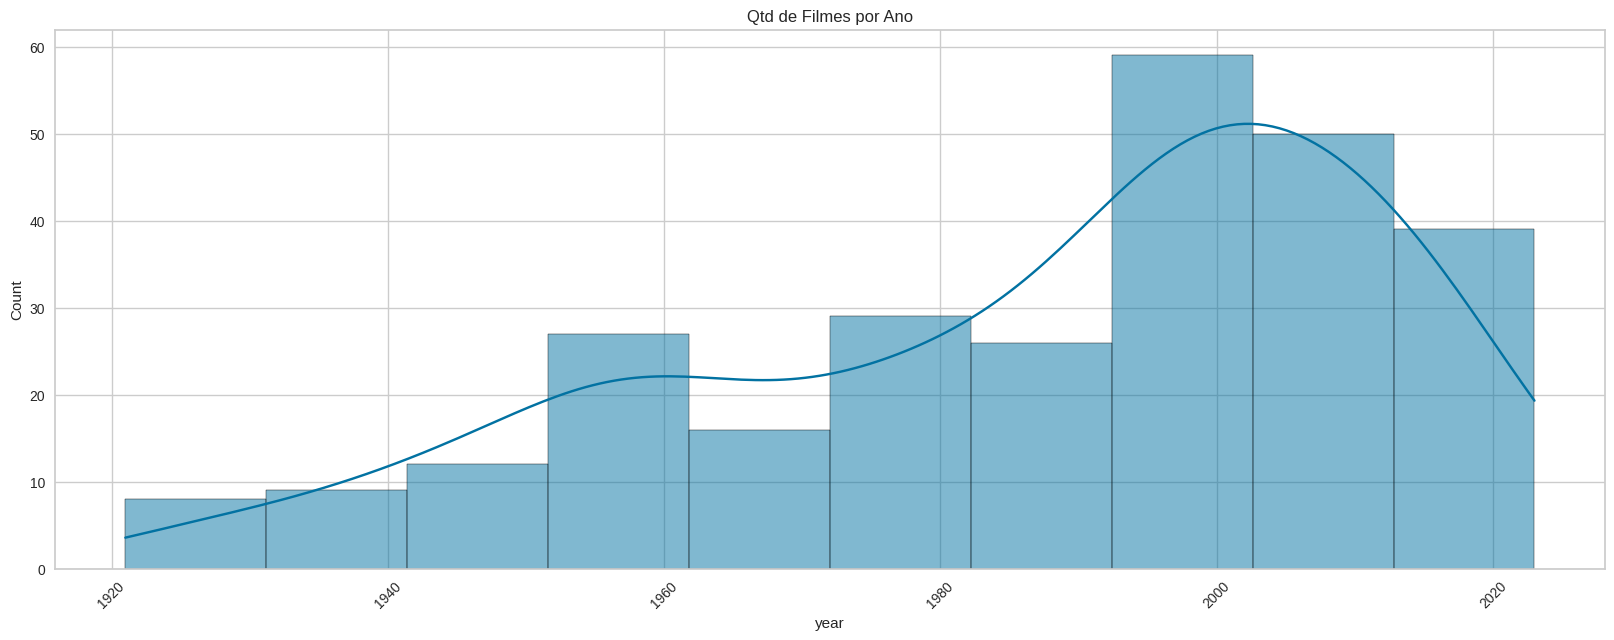

In [68]:
plt.figure(figsize = (20,7))
sns.histplot( df,
              x = 'year',
              kde = True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

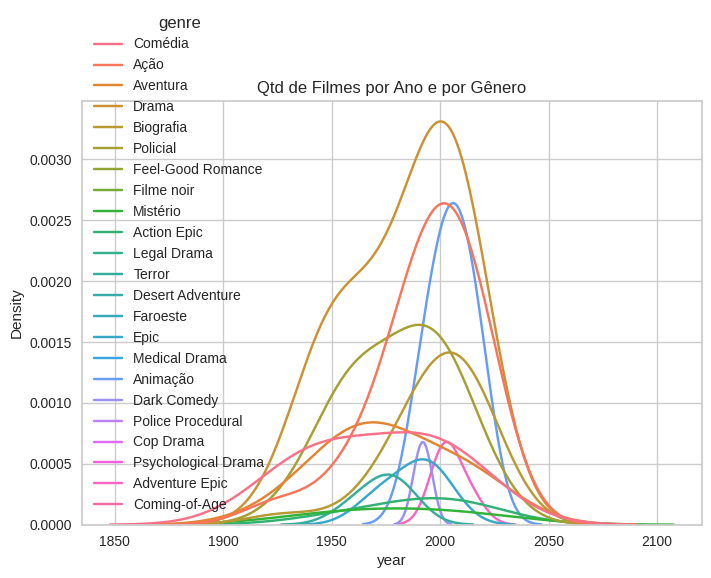

In [69]:
sns.kdeplot( df, x = 'year', hue = 'genre', bw_adjust = 1.5, warn_singular = False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

In [70]:
#convert sinopses to lowercase
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()
df_processed['sinopse'].head()

130    um mendigo cuida de uma criança abandonada, ma...
197    um projecionista de cinema deseja ser um detet...
182    um garimpeiro vai ao klondike em busca de ouro...
190    uns espiões roubam a amada locomotiva de um en...
116    numa cidade futurística dividida entre os trab...
Name: sinopse, dtype: object

In [71]:
def qty_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [72]:
df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
df_processed.head()

title_pt            title_en  year  rating     genre  \
130          O Garoto        131. The Kid  1921     8.2   Comédia   
197  Bancando o Águia   198. Sherlock Jr.  1924     8.2      Ação   
182  Em Busca do Ouro  183. The Gold Rush  1925     8.1  Aventura   
190         A General    191. The General  1926     8.1      Ação   
116        Metrópolis     117. Metropolis  1927     8.3     Drama   

                                               sinopse  word_count  
130  um mendigo cuida de uma criança abandonada, ma...          13  
197  um projecionista de cinema deseja ser um detet...          31  
182  um garimpeiro vai ao klondike em busca de ouro...          15  
190  uns espiões roubam a amada locomotiva de um en...          17  
116  numa cidade futurística dividida entre os trab...          20

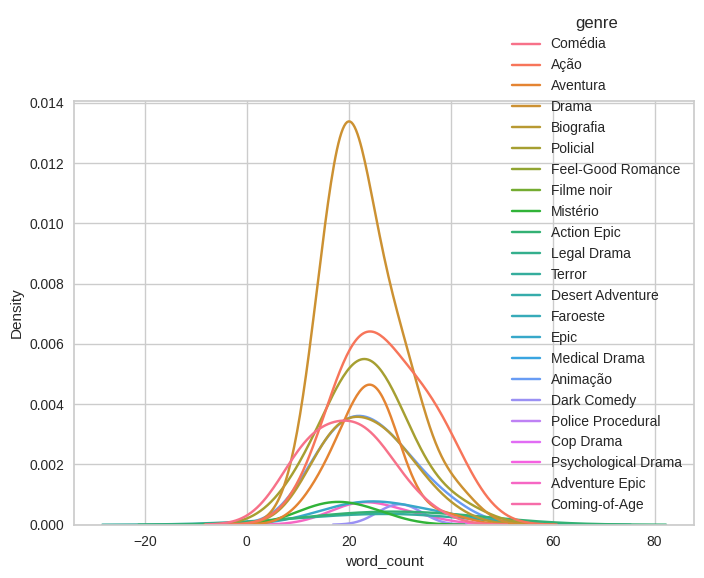

In [73]:
sns.kdeplot( df_processed, x = 'word_count', hue = 'genre', bw_adjust = 1.5, warn_singular = False)
plt.show()

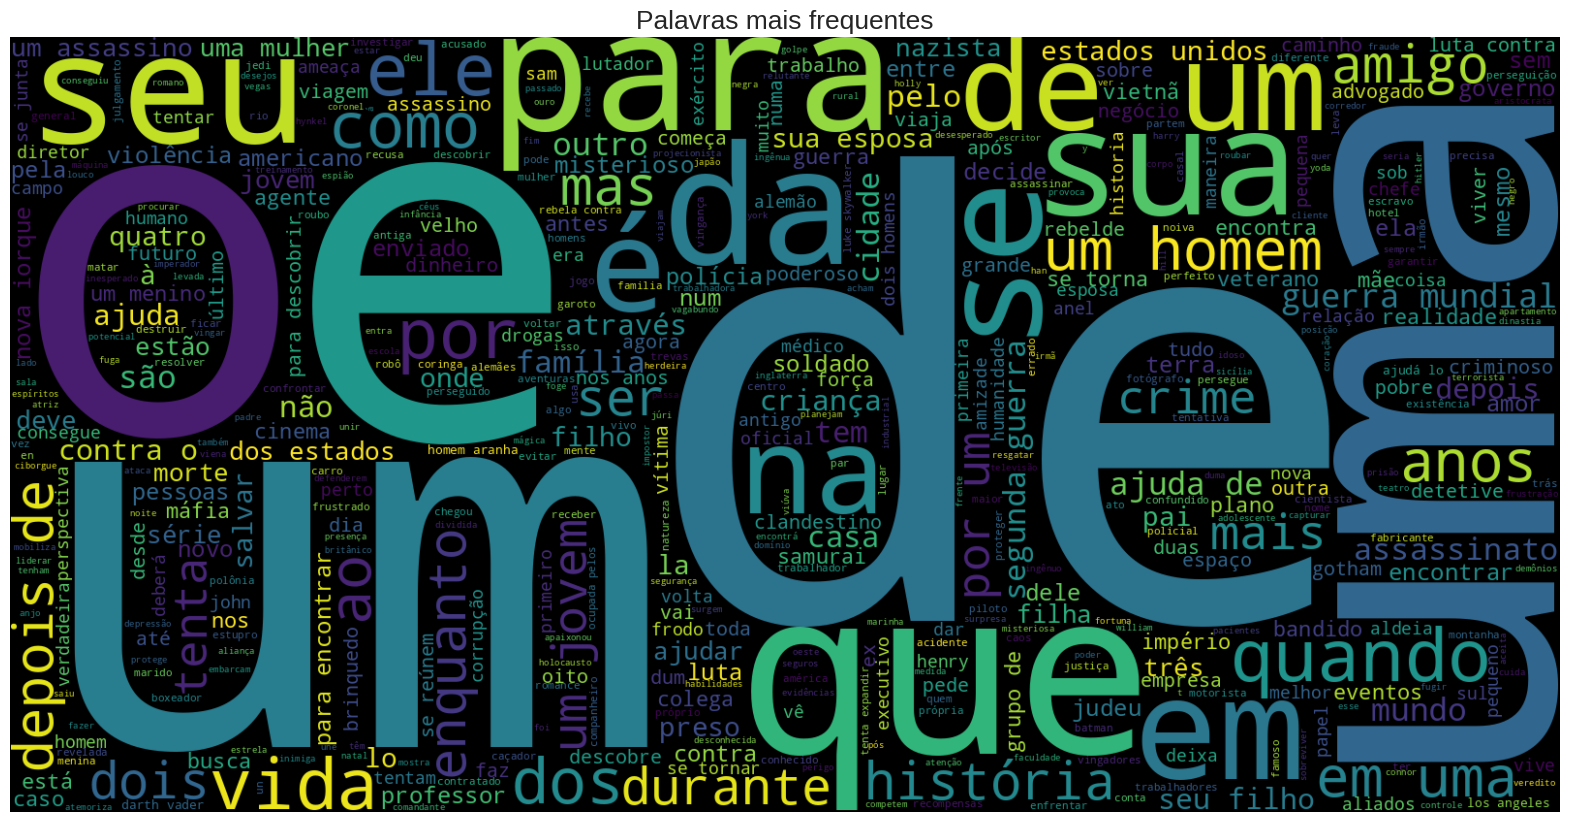

In [74]:
text = ' '.join([phrase for phrase in df_processed['sinopse']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize = 19)
plt.show()

In [75]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


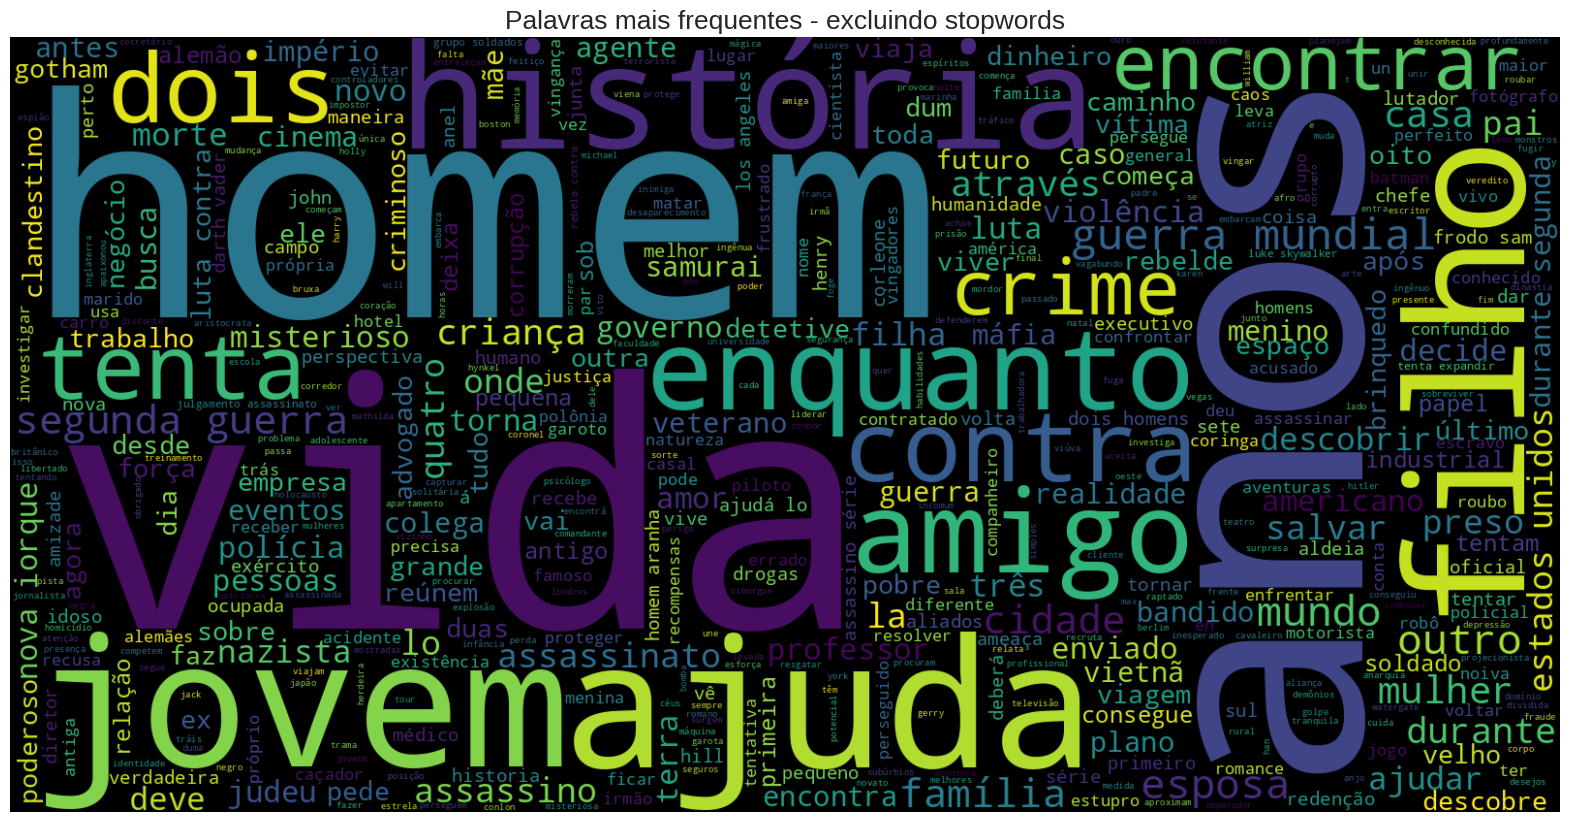

In [76]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
text = ' '.join([phrase for phrase in df_processed['sinopse_no_stopwords']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize = 19)
plt.show()

In [77]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=.05, max_df=0.95, ngram_range=(1,2))
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

In [78]:
print(X.shape)
X.toarray()

(275, 14)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
df_processed

title_pt  \
130                              O Garoto   
197                      Bancando o Águia   
182                      Em Busca do Ouro   
190                             A General   
116                            Metrópolis   
..                                    ...   
218                              Jai Bhim   
126                     Top Gun: Maverick   
16   Homem-Aranha: Através do Aranhaverso   
33                            Oppenheimer   
0                                  Barbie   

                                    title_en  year  rating      genre  \
130                             131. The Kid  1921     8.2    Comédia   
197                        198. Sherlock Jr.  1924     8.2       Ação   
182                       183. The Gold Rush  1925     8.1   Aventura   
190                         191. The General  1926     8.1       Ação   
116                          117. Metropolis  1927     8.3      Drama   
..                                       ...   ...     ...        ...   
218                            219. Jai Bhim  2021     8.8   Policial   
126                   127. Top Gun: Maverick  2022     8.3       Ação   
16   16. Spider-Man: Across the Spider-Verse  2023     8.8   Animação   
33                           33. Oppenheimer  2023     8.6  Biografia   
0                                     Barbie  2023     7.4   Aventura   

                                               sinopse  word_count  \
130  um mendigo cuida de uma criança abandonada, ma...          13   
197  um projecionista de cinema deseja ser um detet...          31   
182  um garimpeiro vai ao klondike em busca de ouro...          15   
190  uns espiões roubam a amada locomotiva de um en...          17   
116  numa cidade futurística dividida entre os trab...          20   
..                                                 ...         ...   
218  quando um homem tribal é preso por um caso de ...          26   
126  após mais de trinta anos de serviço como um do...          39   
16   miles morales, o amigão da vizinhança homem-ar...          38   
33   a história do cientista americano j. robert op...          17   
0    viver na terra da barbie é ser um ser perfeito...          29   

                                  sinopse_no_stopwords  
130  mendigo cuida criança abandonada, eventos amea...  
197  projecionista cinema deseja detetive coloca ma...  
182  garimpeiro vai klondike busca ouro encontra isso.  
190  uns espiões roubam amada locomotiva engenheiro...  
116  cidade futurística dividida trabalhadores plan...  
..                                                 ...  
218  homem tribal preso caso suposto roubo, esposa ...  
126  após trinta anos serviço melhores aviadores ma...  
16   miles morales, amigão vizinhança homem-aranha,...  
33   história cientista americano j. robert oppenhe...  
0    viver terra barbie perfeito lugar perfeito. me...  

[275 rows x 8 columns]

2 143.41536053833093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



3 127.10380978178797
4 112.78735330077704
5 101.90478632045901
6 88.94408358257377
7 79.42934453376657
8 71.69229656188519
9 56.59958608820034
10 50.12203822852647
11 40.498586404665424
12 36.95785429047536
13 31.154246796349707
14 27.520615018277283
15 26.045488516697482
16 25.330232929367853
17 25.545450860181674
18 23.37335253726194
19 22.525174001742315
20 21.189903075593115
21 19.971330408675474
22 19.42858684211208
23 18.198499824089016


Text(0, 0.5, 'WCSS')

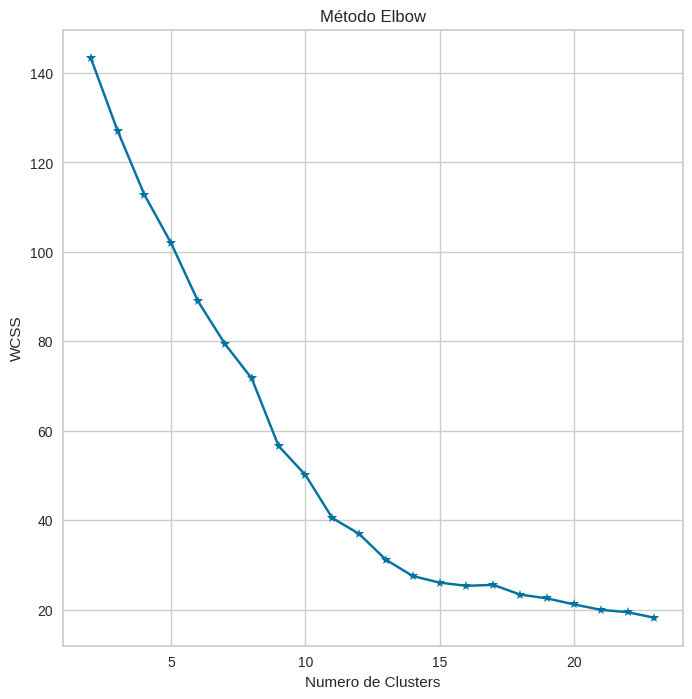

In [80]:
plt.figure(figsize = (8,8))

#plotando o grafico do método elbow
wcss = []

for i in range(2, df_processed.genre.nunique()+1):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(X)
  print(i, kmeans.inertia_)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, df_processed.genre.nunique()+1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of square


In [81]:
df_processed.genre.nunique()

23

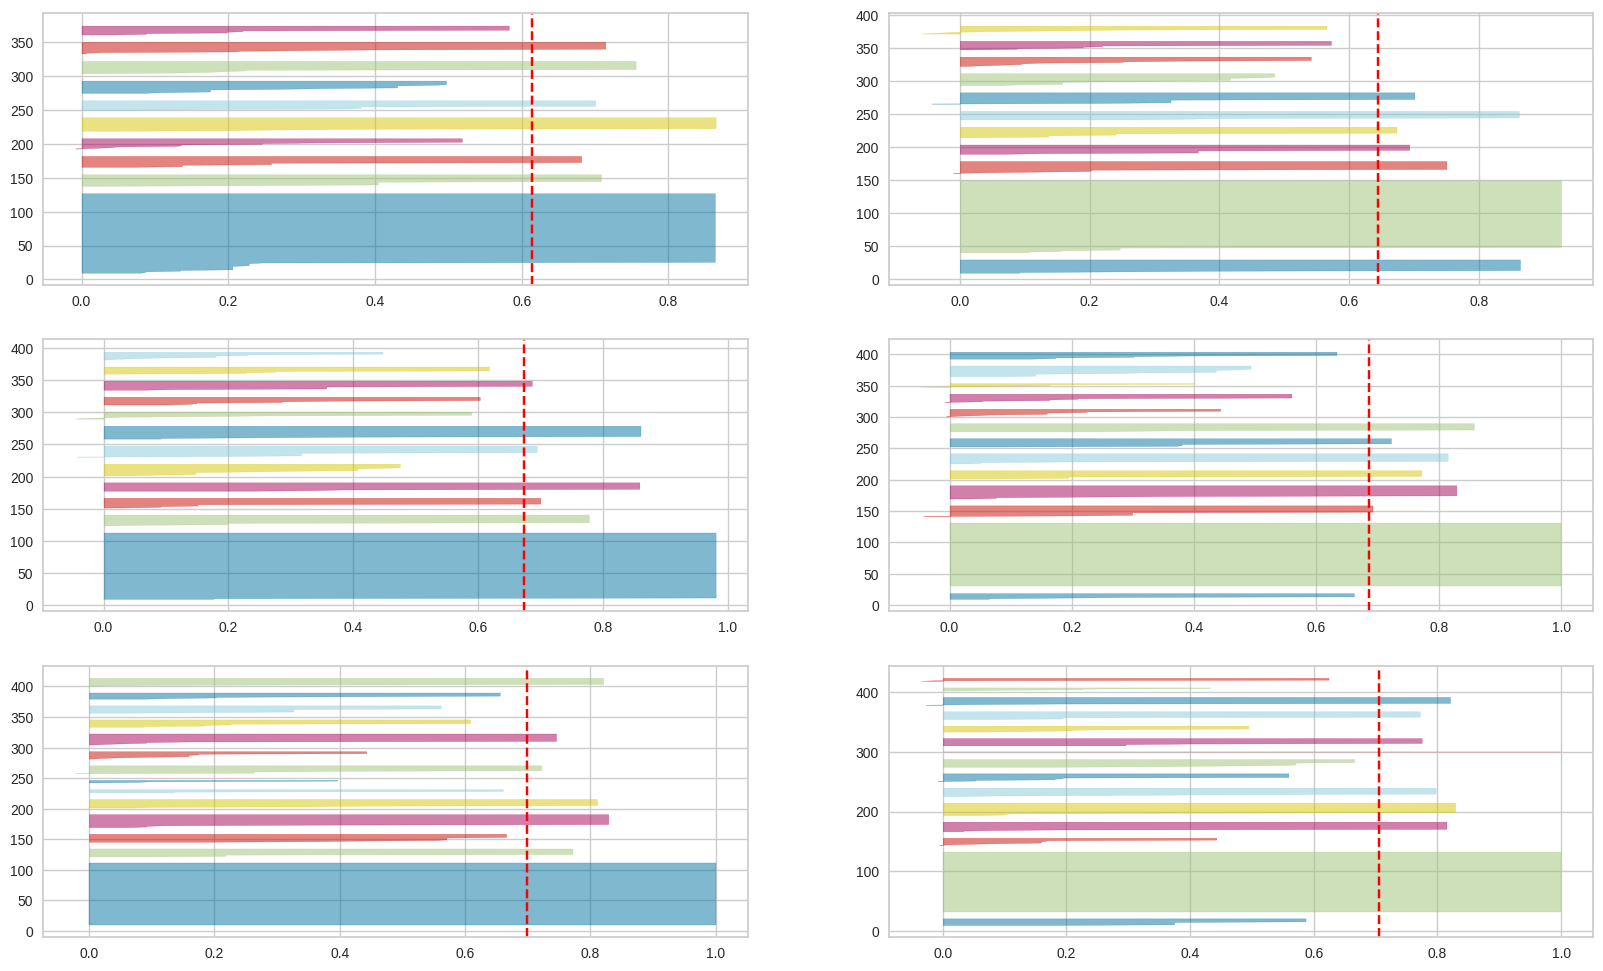

In [82]:
# fig, ax = plt.subplots(3,2, figsize = (20,12))
# for i in (range(10, 17)):
#   #Creating KMeans instance for different number of clusters
#   kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
#   q, mod = divmod(i,2)

#   #Creating SilhouetteVisualizer instance with KMeans instance
#   #Fit the visualizer

#   visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
#   visualizer.fit(X)

fig, ax = plt.subplots(3,2, figsize = (20,12))
for i in range(6):  # Adjusted loop to match the number of subplots
    #Creating KMeans instance for different number of clusters
    kmeans = KMeans(n_clusters = i + 10, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)  # Calculate row and column indices

    #Creating SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer

    visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q][mod])  # Access correct subplot
    visualizer.fit(X)

In [83]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans = kmeans.fit(X)
#predicting the clusters and store cluster labels in a variable
labels = kmeans.predict(X)
#getting the cluster centers
c = kmeans.cluster_centers_

df_processed['cluster'] = labels
df_processed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



title_pt            title_en  year  rating     genre  \
130          O Garoto        131. The Kid  1921     8.2   Comédia   
197  Bancando o Águia   198. Sherlock Jr.  1924     8.2      Ação   
182  Em Busca do Ouro  183. The Gold Rush  1925     8.1  Aventura   
190         A General    191. The General  1926     8.1      Ação   
116        Metrópolis     117. Metropolis  1927     8.3     Drama   

                                               sinopse  word_count  \
130  um mendigo cuida de uma criança abandonada, ma...          13   
197  um projecionista de cinema deseja ser um detet...          31   
182  um garimpeiro vai ao klondike em busca de ouro...          15   
190  uns espiões roubam a amada locomotiva de um en...          17   
116  numa cidade futurística dividida entre os trab...          20   

                                  sinopse_no_stopwords  cluster  
130  mendigo cuida criança abandonada, eventos amea...        0  
197  projecionista cinema deseja detetive coloca ma...        0  
182  garimpeiro vai klondike busca ouro encontra isso.        0  
190  uns espiões roubam amada locomotiva engenheiro...        0  
116  cidade futurística dividida trabalhadores plan...        0

In [84]:
fig = px.bar(df_processed.cluster.value_counts(),
             text_auto = True,
             title = 'Qtd de Filmes por Cluster',
             labels = {'index': 'Cluster #',
                       'value':'Qtd. de Filmes'})
fig.show()

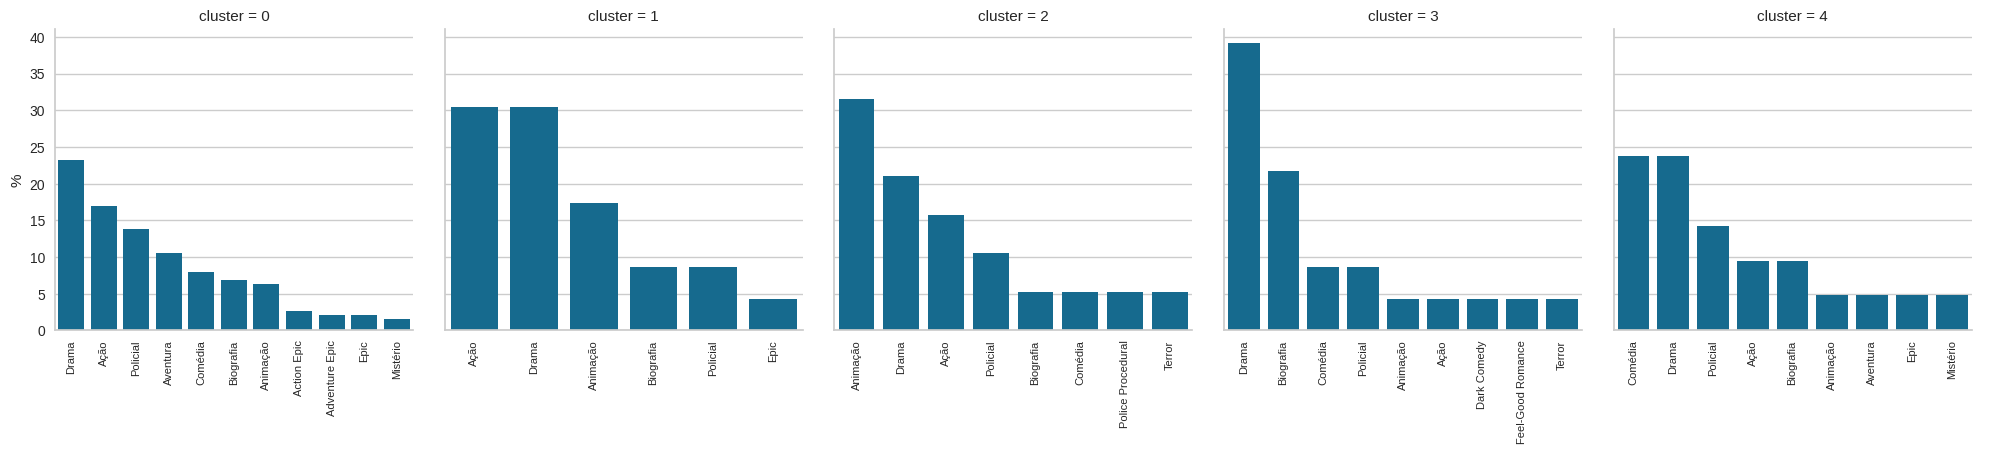

In [85]:
df_plot = df_processed.groupby(['cluster', 'genre'])['title_pt'].count()
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'title_pt':'count'}, inplace = True)
df_plot['%'] = 100 * df_plot['count'] / df_plot.groupby('cluster')['count'].transform('sum')
df_plot = df_plot.sort_values(['cluster', '%'], ascending = False).groupby('cluster').head(11)

fig = sns.catplot(
    data=df_plot, x="genre", y = "%", col="cluster",
    kind="bar", height=4, aspect=1, sharex = False);
fig.set_xlabels('');
fig.set_xticklabels(rotation=90, size = 8);

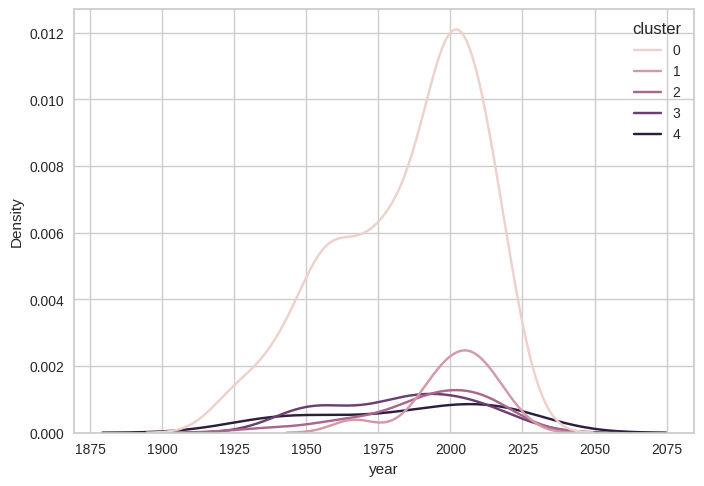

In [86]:
sns.kdeplot(df_processed, x = 'year', hue = 'cluster');

In [87]:
df_pivot = df_plot.copy()
df_pivot = df_pivot.pivot(index = 'cluster', columns = 'genre', values = '%')
df_pivot.fillna(0, inplace = True)
df_pivot = df_pivot.T.reset_index()
df_pivot.index.name = None
df_pivot

cluster              genre          0          1          2          3  \
0              Action Epic   2.645503   0.000000   0.000000   0.000000   
1           Adventure Epic   2.116402   0.000000   0.000000   0.000000   
2                 Animação   6.349206  17.391304  31.578947   4.347826   
3                 Aventura  10.582011   0.000000   0.000000   0.000000   
4                     Ação  16.931217  30.434783  15.789474   4.347826   
5                Biografia   6.878307   8.695652   5.263158  21.739130   
6                  Comédia   7.936508   0.000000   5.263158   8.695652   
7              Dark Comedy   0.000000   0.000000   0.000000   4.347826   
8                    Drama  23.280423  30.434783  21.052632  39.130435   
9                     Epic   2.116402   4.347826   0.000000   0.000000   
10       Feel-Good Romance   0.000000   0.000000   0.000000   4.347826   
11                Mistério   1.587302   0.000000   0.000000   0.000000   
12       Police Procedural   0.000000   0.000000   5.263158   0.000000   
13                Policial  13.756614   8.695652  10.526316   8.695652   
14                  Terror   0.000000   0.000000   5.263158   4.347826   

cluster          4  
0         0.000000  
1         0.000000  
2         4.761905  
3         4.761905  
4         9.523810  
5         9.523810  
6        23.809524  
7         0.000000  
8        23.809524  
9         4.761905  
10        0.000000  
11        4.761905  
12        0.000000  
13       14.285714  
14        0.000000

In [88]:
df_polar = df_pivot.melt(id_vars=['genre'])
df_polar.head()

genre cluster      value
0     Action Epic       0   2.645503
1  Adventure Epic       0   2.116402
2        Animação       0   6.349206
3        Aventura       0  10.582011
4            Ação       0  16.931217

In [89]:
fig = px.line_polar(df_polar, r='value', theta='genre', color = 'cluster', line_close=True)
fig.show();

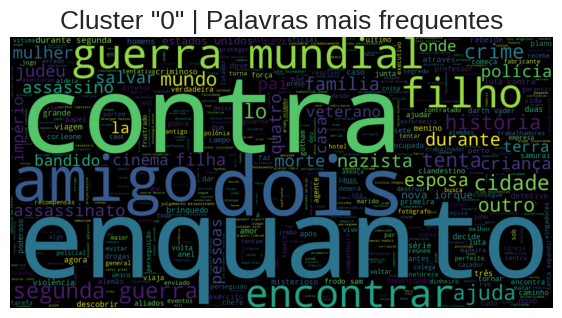

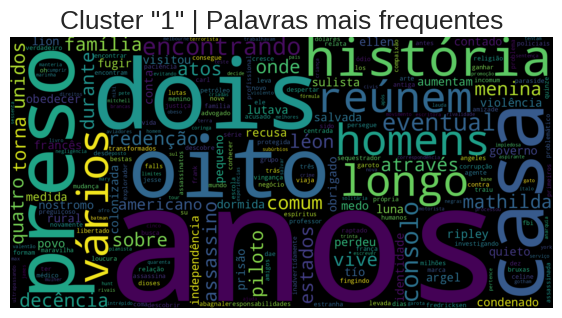

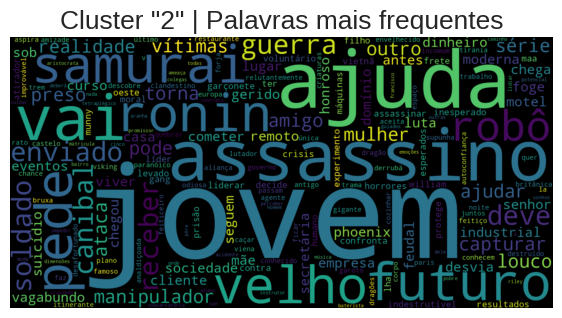

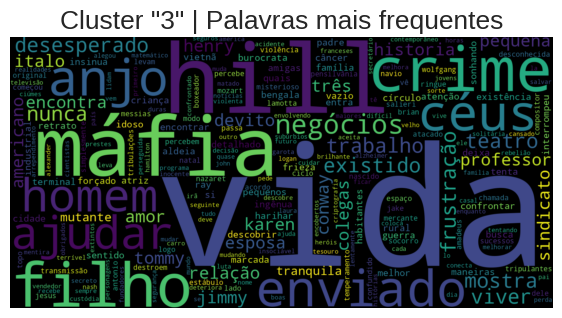

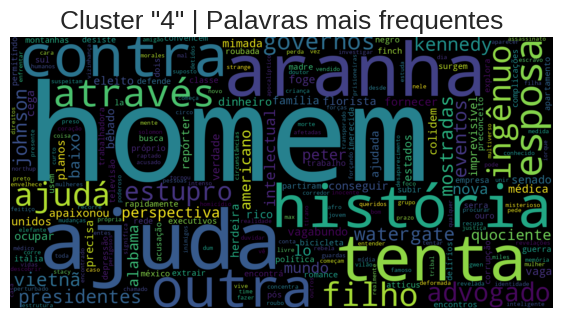

In [90]:
def word_cloud_cluster(cluster:int):
  text = ' '.join([phrase for phrase in df_processed.loc[df_processed.cluster == cluster]['sinopse_no_stopwords']])
  plt.figure(figsize=(7,5), facecolor='None')
  wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster "{cluster}" | Palavras mais frequentes', fontsize = 19)
  plt.show()
  return

for c in range(5):
  word_cloud_cluster(c)

# Notebook_2


In [91]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
# importado o gerados de dados
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



# importing libraries
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

In [92]:
# preparando o plot em 3-D
from mpl_toolkits.mplot3d import Axes3D

# preparando o tamanho do plot
plt.rcParams['figure.figsize'] = (20, 14)

In [93]:

# Criando um sample dataset com 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=123)

In [94]:
# verificando o tamanho dos dados
X.shape,y.shape

((800, 3), (800,))

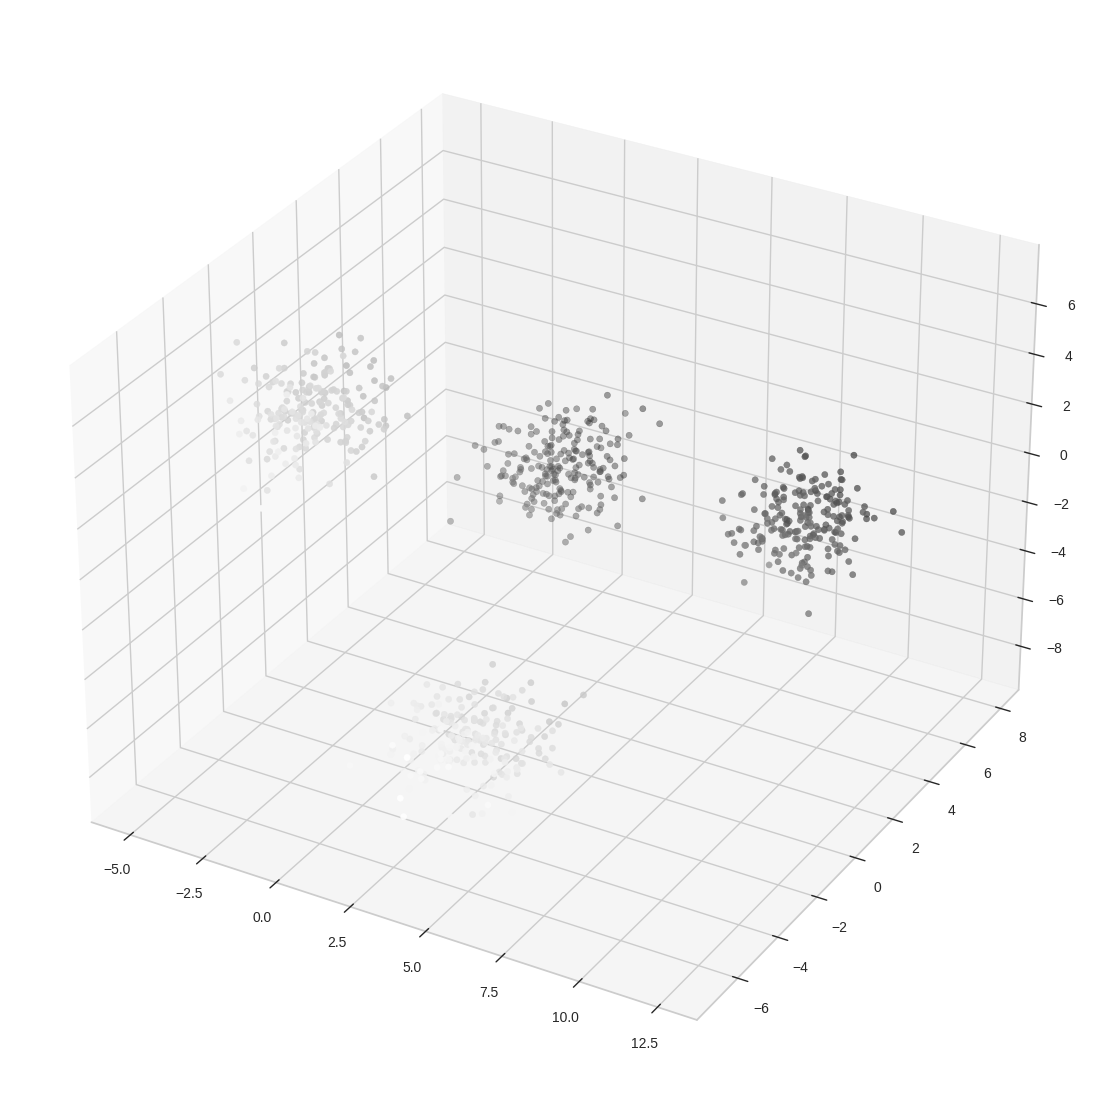

In [95]:
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, marker='o')


In [96]:

# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [97]:
C

array([[ 3.92641951, -4.32154363, -5.42941397],
       [ 9.59804372,  3.64965739, -0.36885258],
       [-2.10872876, -3.06868236,  4.66812604],
       [ 0.97539985,  4.3661875 , -1.61345723]])

In [98]:
type(X)

numpy.ndarray

In [99]:
x_df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

In [100]:
x_df

X         Y         Z
0     9.160321  2.900349 -1.177992
1     1.789456  2.581758 -1.851945
2    10.491610  4.233840 -0.269436
3    -2.706095 -1.693681  5.635382
4     1.017393  4.967173 -1.707615
..         ...       ...       ...
795   5.713741 -2.689145 -5.350327
796   1.696808  4.061615 -0.525003
797   8.646339  4.297642 -1.302646
798   3.680728 -4.946860 -5.476575
799   3.689715 -4.133906 -5.209154

[800 rows x 3 columns]

In [101]:
x_df.describe()

X           Y           Z
count  800.000000  800.000000  800.000000
mean     3.097784    0.156405   -0.685899
std      4.435994    4.008409    3.731158
min     -5.077679   -6.908651   -8.694026
25%     -0.703785   -3.604171   -3.710796
50%      2.435475   -0.421513   -0.937558
75%      7.031799    4.066675    1.751195
max     12.465992    7.960959    7.168003

In [102]:
x_df['clusters'] = labels
x_df

X         Y         Z  clusters
0     9.160321  2.900349 -1.177992         1
1     1.789456  2.581758 -1.851945         3
2    10.491610  4.233840 -0.269436         1
3    -2.706095 -1.693681  5.635382         2
4     1.017393  4.967173 -1.707615         3
..         ...       ...       ...       ...
795   5.713741 -2.689145 -5.350327         0
796   1.696808  4.061615 -0.525003         3
797   8.646339  4.297642 -1.302646         1
798   3.680728 -4.946860 -5.476575         0
799   3.689715 -4.133906 -5.209154         0

[800 rows x 4 columns]

In [103]:
cluster0 = x_df[ x_df['clusters'] == 0 ]
cluster1 = x_df[ x_df['clusters'] == 1 ]

In [104]:
cluster0.describe()

X           Y           Z  clusters
count  200.000000  200.000000  200.000000     200.0
mean     3.926420   -4.321544   -5.429414       0.0
std      1.082635    1.010799    0.892866       0.0
min      1.130795   -6.908651   -8.694026       0.0
25%      3.236415   -5.041330   -6.017122       0.0
50%      3.799924   -4.293857   -5.379492       0.0
75%      4.579298   -3.595085   -4.788041       0.0
max      6.888009   -1.717363   -3.406504       0.0

In [105]:
cluster1.describe()

X           Y           Z  clusters
count  200.000000  200.000000  200.000000     200.0
mean     9.598044    3.649657   -0.368853       1.0
std      0.942821    0.955106    0.986199       0.0
min      7.463169    0.109101   -4.182740       1.0
25%      8.942958    3.039884   -0.974464       1.0
50%      9.624435    3.606078   -0.327672       1.0
75%     10.268263    4.284797    0.265594       1.0
max     12.465992    6.067983    1.889672       1.0

In [106]:
C

array([[ 3.92641951, -4.32154363, -5.42941397],
       [ 9.59804372,  3.64965739, -0.36885258],
       [-2.10872876, -3.06868236,  4.66812604],
       [ 0.97539985,  4.3661875 , -1.61345723]])

In [107]:
labels

array([1, 3, 1, 2, 3, 2, 2, 2, 3, 3, 0, 2, 0, 2, 1, 2, 0, 2, 0, 3, 0, 0,
       1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 3, 1, 3, 3, 3, 2, 0, 0,
       2, 0, 1, 1, 3, 0, 2, 0, 3, 3, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2,
       2, 3, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 3, 3, 0,
       0, 1, 0, 2, 0, 2, 3, 3, 0, 1, 1, 0, 2, 1, 2, 3, 0, 1, 2, 2, 0, 3,
       0, 3, 2, 1, 2, 0, 3, 1, 2, 0, 0, 2, 0, 3, 1, 3, 2, 1, 1, 1, 2, 3,
       1, 0, 3, 0, 1, 3, 2, 1, 2, 2, 3, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 0, 0, 0, 3, 3, 1, 3, 1, 0, 2,
       3, 3, 0, 3, 0, 0, 3, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 3, 3, 0,
       3, 2, 1, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 3, 2, 0, 0, 1, 3, 3, 2, 3,
       2, 0, 2, 2, 0, 2, 3, 1, 2, 1, 0, 1, 2, 0, 1, 3, 3, 2, 3, 2, 2, 0,
       1, 2, 3, 0, 3, 0, 2, 3, 3, 0, 0, 3, 1, 2, 2, 3, 3, 1, 2, 1, 1, 3,
       0, 1, 0, 0, 3, 0, 3, 2, 0, 2, 3, 1, 3, 0, 1, 0, 0, 2, 2, 3, 0, 1,
       1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 3, 1, 3, 2, 1,

Cluster  1
[ 3.92641951 -4.32154363 -5.42941397]
Cluster  2
[ 9.59804372  3.64965739 -0.36885258]
Cluster  3
[-2.10872876 -3.06868236  4.66812604]
Cluster  4
[ 0.97539985  4.3661875  -1.61345723]


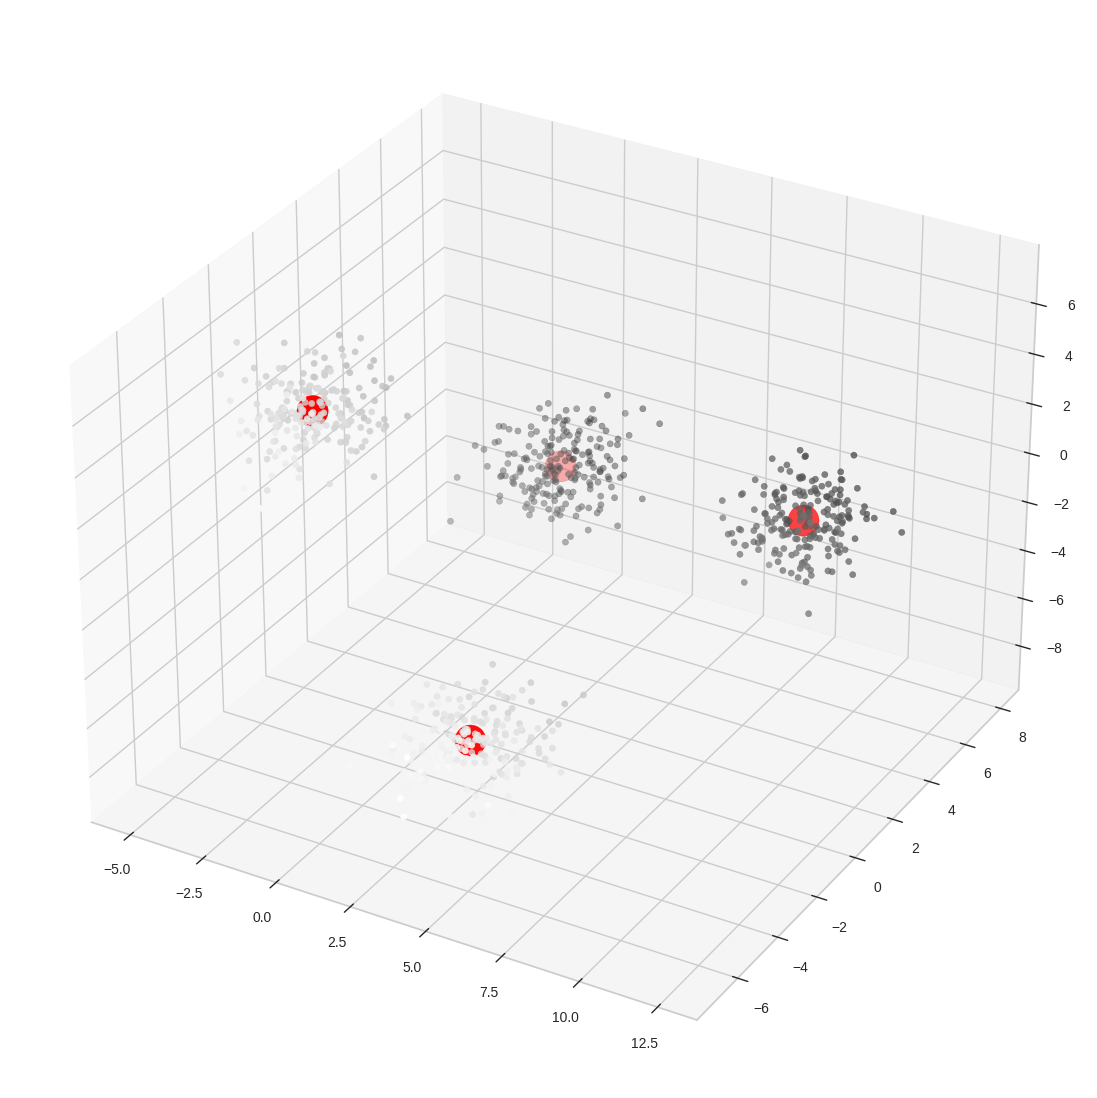

In [108]:
# plotando os clusters em 3-D
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, marker='o');

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='red', s=500)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

1 39683.87351162204
2 22037.32785362758
3 9913.518408958907
4 2272.2740654943464
5 2104.973298140887
6 1972.9455287573053
7 1832.4122079566282
8 1727.6917249462872
9 1622.849659910329
10 1517.3328306980654


Text(0, 0.5, 'WSS')

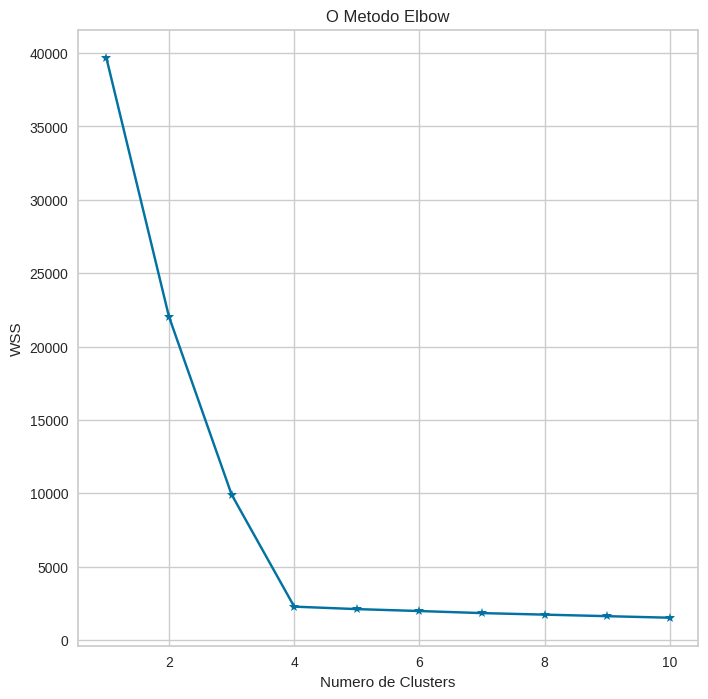

In [109]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,'*-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares

In [110]:

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

In [111]:
# k_max = 0
# x_max = 0
# for c, x in zip(n_cluster_list, sillhoute_scores):
#   if x > x_max:
#     x_max = x
#     k_max = c
# print(k_max,x_max)

#or in one line code
k_max, x_max = max(zip(n_cluster_list, sillhoute_scores), key=lambda x: x[1])
print(k_max,x_max)

4 0.7654794562863085


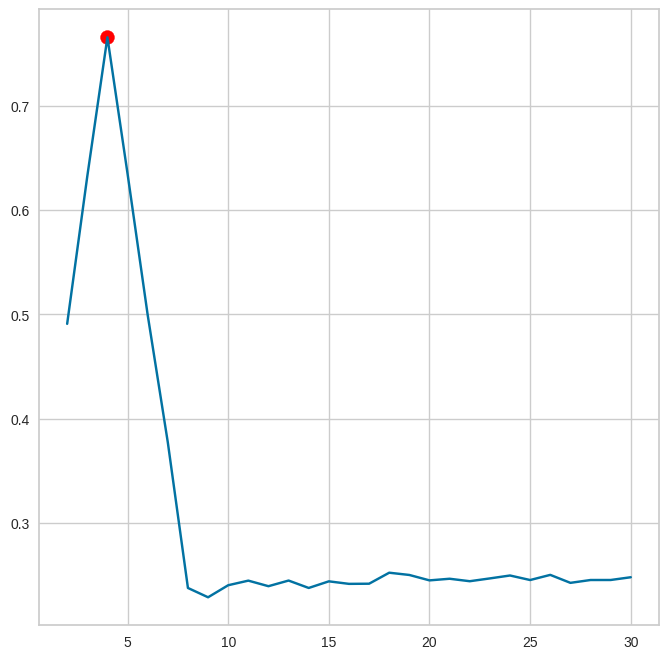

In [112]:
plt.figure(figsize=(8,8))
plt.plot(n_cluster_list,sillhoute_scores)
plt.scatter(k_max, x_max, color='red', s = 100)
plt.show()

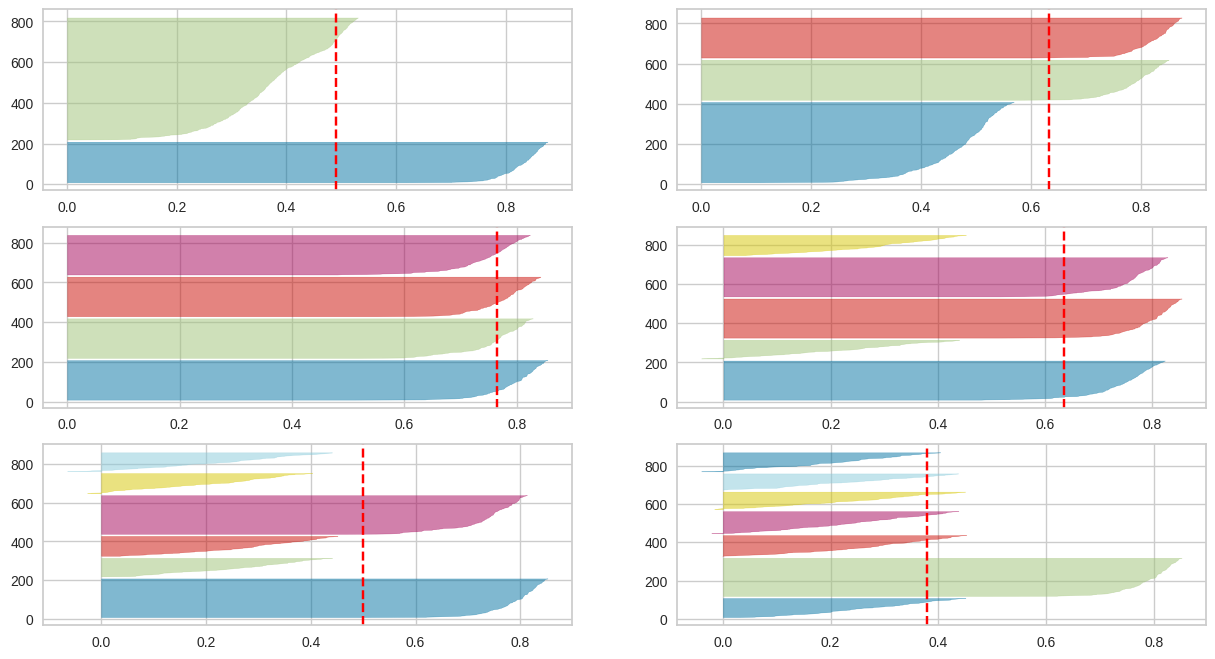

In [113]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# O final:

In [153]:
from google.colab import files
uploaded = files.upload()


Saving all_movies.csv to all_movies.csv


In [173]:
import pandas as pd

# Corrigir a leitura do arquivo CSV
file_path = '/content/all_movies.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8', delimiter=',', error_bad_lines=False)
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")

# Exibir as primeiras linhas e colunas do dataframe
print(df.head())
print(df.columns)


Erro ao ler o arquivo: read_csv() got an unexpected keyword argument 'error_bad_lines'
                         title_pt                     title_en  year  rating  \
0                          Barbie                       Barbie  2023     7.4   
1           Um Sonho de Liberdade  1. The Shawshank Redemption  1994     9.3   
2               O Poderoso Chefão             2. The Godfather  1972     9.2   
3  Batman: O Cavaleiro das Trevas           3. The Dark Knight  2008     9.0   
4            O Poderoso Chefão II     4. The Godfather Part II  1974     9.0   

      genre                                            sinopse  cluster  \
0  Aventura  Viver na Terra da Barbie é ser um ser perfeito...        2   
1     Drama  Dois homens presos se reúnem ao longo de vário...        1   
2  Policial  O patriarca idoso de uma dinastia do crime org...        0   
3      Ação  Quando a ameaça conhecida como O Coringa surge...        2   
4  Policial  Em 1950, Michael Corleone, agora à frente da

In [157]:
# Tentar outra codificação se necessário
try:
    df = pd.read_csv(file_path, encoding='latin1', delimiter=',', error_bad_lines=False)
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")

# Exibir as primeiras linhas e colunas do dataframe
print(df.head())
print(df.columns)


Erro ao ler o arquivo: read_csv() got an unexpected keyword argument 'error_bad_lines'
                         title_pt                     title_en  year  rating  \
0                          Barbie                       Barbie  2023     7.4   
1           Um Sonho de Liberdade  1. The Shawshank Redemption  1994     9.3   
2               O Poderoso Chefão             2. The Godfather  1972     9.2   
3  Batman: O Cavaleiro das Trevas           3. The Dark Knight  2008     9.0   
4            O Poderoso Chefão II     4. The Godfather Part II  1974     9.0   

      genre                                            sinopse  
0  Aventura  Viver na Terra da Barbie é ser um ser perfeito...  
1     Drama  Dois homens presos se reúnem ao longo de vário...  
2  Policial  O patriarca idoso de uma dinastia do crime org...  
3      Ação  Quando a ameaça conhecida como O Coringa surge...  
4  Policial  Em 1950, Michael Corleone, agora à frente da f...  
Index(['title_pt', 'title_en', 'year', 'ra

In [158]:
# Verificar dados e identificar problemas
print(df.info())
print(df.describe())

# Corrigir problemas de codificação em colunas específicas se necessário
df['sinopse'] = df['sinopse'].str.replace('Ã©', 'é')  # Exemplo de correção


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title_pt  250 non-null    object 
 1   title_en  250 non-null    object 
 2   year      250 non-null    int64  
 3   rating    250 non-null    float64
 4   genre     250 non-null    object 
 5   sinopse   250 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB
None
              year      rating
count   250.000000  250.000000
mean   1986.684000    8.302800
std      25.508171    0.239545
min    1921.000000    7.400000
25%    1966.000000    8.100000
50%    1994.000000    8.200000
75%    2007.000000    8.400000
max    2023.000000    9.300000


In [159]:
# Importar bibliotecas necessárias para o processamento e modelagem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vetorização da sinopse
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['sinopse'])

# Repetir o treinamento do modelo KMeans com k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Adicionar os rótulos dos clusters ao DataFrame
df['cluster'] = kmeans.labels_

# Exibir resultados dos clusters
print(df[['title_en', 'cluster']].head())


                      title_en  cluster
0                       Barbie        2
1  1. The Shawshank Redemption        1
2             2. The Godfather        0
3           3. The Dark Knight        2
4     4. The Godfather Part II        2


In [161]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


In [162]:
import re
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer

# Função para limpar o texto
def preprocess_text(text):
    text = unidecode.unidecode(text)  # Remove acentuação
    text = re.sub(r'\s+', ' ', text)  # Remove espaços extras
    text = text.lower()  # Converte para minúsculas
    return text

# Aplicar a limpeza à coluna 'sinopse'
df['clean_sinopse'] = df['sinopse'].apply(preprocess_text)

# Vetorização da sinopse
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_sinopse'])


In [163]:
from sklearn.cluster import KMeans

# Treinar o modelo KMeans com k=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Adicionar os rótulos dos clusters ao DataFrame
df['cluster'] = kmeans.labels_

# Exibir resultados dos clusters
print(df[['title_en', 'cluster']].head())


                      title_en  cluster
0                       Barbie        2
1  1. The Shawshank Redemption        1
2             2. The Godfather        0
3           3. The Dark Knight        2
4     4. The Godfather Part II        2


In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Processamento das features textuais
text_vectorizer = TfidfVectorizer(stop_words='english')
X_text = text_vectorizer.fit_transform(df['clean_sinopse'])

# Adicionar as features numéricas
numeric_features = df[['year', 'rating']].values
scaler = StandardScaler()
X_numeric = scaler.fit_transform(numeric_features)

# Combinar as features textuais e numéricas
from scipy.sparse import hstack
X_combined = hstack([X_text, X_numeric])

# Treinar o modelo KMeans com k=5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_combined)

# Adicionar os rótulos dos clusters ao DataFrame
df['cluster_combined'] = kmeans.labels_

# Exibir resultados dos clusters
print(df[['title_en', 'cluster_combined']].head())


                      title_en  cluster_combined
0                       Barbie                 2
1  1. The Shawshank Redemption                 1
2             2. The Godfather                 1
3           3. The Dark Knight                 1
4     4. The Godfather Part II                 1
